In [2]:
import pandas as pd
cl =  'clinical.tsv'
samples = pd.read_csv(cl, sep='\t')

In [126]:
dead = samples[samples['vital_status'].str.match('Dead')]
#dead.to_csv('dead_people.csv', index=True)

In [4]:
TCGA_names = dead['case_submitter_id'].to_list()
days = dead['days_to_death'].to_list()

In [5]:
d = {'TCGA':TCGA_names,'Days':days}
samples_df = pd.DataFrame(d, columns=['TCGA','Days'])
samples_df = samples_df.set_index('TCGA')
samples_df = samples_df.drop_duplicates()

In [29]:
ca = 'CD44_samples_ca.tsv'
samples_ca = pd.read_csv(ca, sep='\t')
samples_ca = samples_ca.set_index('index')
TCGA_2 = samples_ca.columns.values.tolist()
TCGA_names = samples_df.index.values.tolist()
samples_ca = samples_ca.drop(['stages'], axis=0)
samples_ca

,TCGA-3L-AA1B,TCGA-4N-A93T,TCGA-4T-AA8H,TCGA-5M-AAT4,TCGA-5M-AAT5,TCGA-5M-AAT6,TCGA-5M-AATA,TCGA-5M-AATE,TCGA-A6-2675,TCGA-A6-2682,...,TCGA-QG-A5YW,TCGA-QG-A5YX,TCGA-QG-A5Z1,TCGA-QG-A5Z2,TCGA-QL-A97D,TCGA-RU-A8FL,TCGA-SS-A7HO,TCGA-T9-A92H,TCGA-WS-AB45,Unnamed: 288
index,,,,,,,,,,,,,,,,,,,,,
uc001mvu,0.950711516979343,0.33634503678355104,2.33179570991506,2.48388041868446,1.989445,2.49732393213555,2.940802,1.4015979415560502,1.0297660529782,0.350084297810286,...,1.58295819768529,2.3711789868972297,1.2888618966873,1.2632505071653701,2.84720891886887,1.9896691925829801,0.379288952996855,1.0164072214275999,0.17131422058127405,NaN
uc001mvv,3.70434773759656,3.7664743227968995,4.9823322087709805,5.37927433289311,5.364193,5.76168716642264,4.411019,3.9370659185440697,4.9706566501862905,3.6910978248805,...,4.5318524434990195,4.706613344062291,3.76328238007294,5.03946030403015,4.28004005958758,5.9857252537709105,3.06216197611402,5.51262219173409,1.97494873806847,NaN
uc001mvw,7.36670964214525,6.710087071343549,7.505747921808901,7.48726611812464,7.486145,6.463028453097769,4.824345,7.22036996935157,6.69365789590222,6.408983927927389,...,7.66974089768573,6.912727568540009,7.02606534691993,7.7246773086232805,7.189190746880731,6.676762144802519,5.313982821693349,6.6201763192198895,3.1772191345352296,NaN
uc001mvx,3.8414821306618396,3.31244739015756,2.7249111059685296,2.1878610558432703,2.572413,4.26431771103936,2.906336,3.3920045500616003,4.80946138505642,4.80094832280598,...,3.88933665414542,2.8410832160863704,3.66961390356031,4.18210696482493,3.73632404838802,2.70279697992245,2.5118808778321,3.1083279243052404,6.71385808647318,NaN
uc001mwy,0.0,7.01460130236366,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0565964709985,0.0,0.0,0.0,NaN
uc001mwc,1.7509548421941998,0.0,1.01467715674332,0.0,0.000000,2.0976957390696898,0.498838,0.0,1.3337836218415802,2.2845255811506404,...,2.08290659040898,0.0,1.4426210235030499,1.8987568320667498,0.8443096773053421,1.51818477104487,0.0,0.0,4.4013624980104895,NaN
uc010rer,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.88346753180998,0.0,0.0,NaN


In [100]:
ca = 'TCGA_dead.tsv' # table with intersection of TCGA_2 and TCGA_names
dead_p = pd.read_csv(ca, sep='\t')
dead_p = dead_p.set_index('TCGA')
TCGA_names = dead_p.index.values.tolist()

fin_df = samples_ca[TCGA_names]
days = []
for i in TCGA_names:
    days.append(samples_df.loc[i, 'Days'])
len(days)

65

In [107]:
melt_df = pd.melt(fin_df)
isoforms = ['CD44-208', 'CD44-206', 'CD44-209', 'CD44-201', 'CD44-203', 'CD44-210','CD44-205']
iso = isoforms*65
days_2 = days*7
j=0
for i in days_2:
    days_2[j] = int(i)
    j+=1
melt_df['Isoform'] = iso
melt_df['Days'] = days_2
melt_df = melt_df.rename(columns={"variable": "TCGA", "value": "Expression"})
melt_df = melt_df.set_index('TCGA')

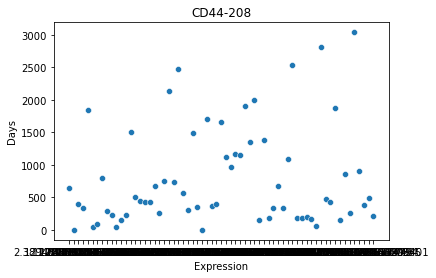

In [128]:
i = melt_df[melt_df['Isoform'].str.match('CD44-208')]
i
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-208')
plot.get_figure().savefig('CD44-208.png', dpi=300)

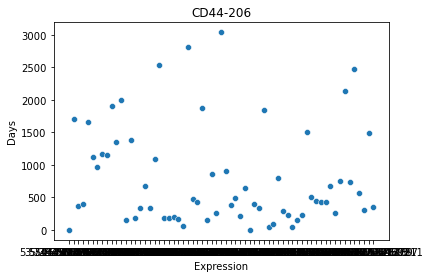

In [127]:
i = melt_df[melt_df['Isoform'].str.match('CD44-206')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-206')
plot.get_figure().savefig('CD44-206.png', dpi=300)

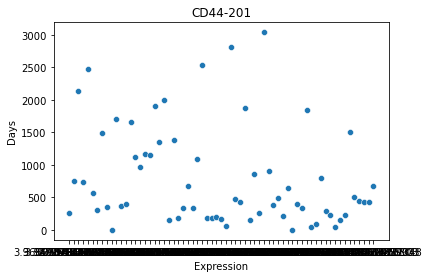

In [121]:
i = melt_df[melt_df['Isoform'].str.match('CD44-201')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-201')
plot.get_figure().savefig('CD44-201.png', dpi=300)

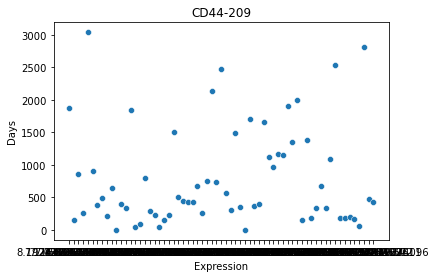

In [122]:
i = melt_df[melt_df['Isoform'].str.match('CD44-209')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-209')
plot.get_figure().savefig('CD44-209.png', dpi=300)

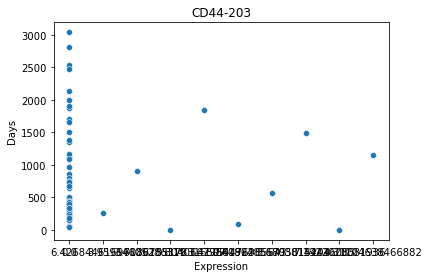

In [123]:
i = melt_df[melt_df['Isoform'].str.match('CD44-203')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-203')
plot.get_figure().savefig('CD44-203.png', dpi=300)

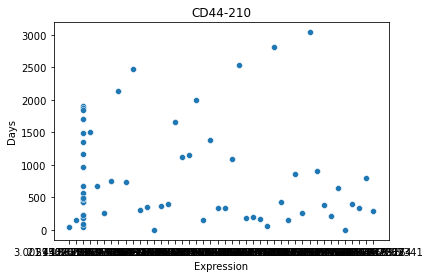

In [124]:
i = melt_df[melt_df['Isoform'].str.match('CD44-210')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-210')
plot.get_figure().savefig('CD44-210.png', dpi=300)

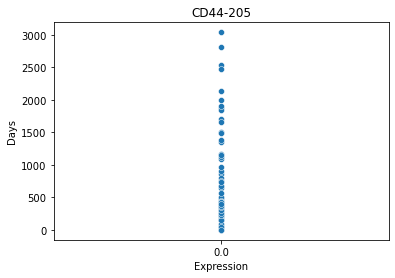

In [125]:
i = melt_df[melt_df['Isoform'].str.match('CD44-205')]
plot = sns.scatterplot(data=i, x="Expression", y="Days").set_title('CD44-205')
plot.get_figure().savefig('CD44205.png', dpi=300)